In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv(r"C:\Users\USER\Documents\DS12\my_project\cilmate\Juiz_de_fora_Clean.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
0,1,Juiz_de_fora,25/05/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juiz_de_fora,26/05/2007,NaN,912.090000,8.590000,18.9,NaN,NaN,60.300000,49.0,8.4,3.020000,NaN
2,3,Juiz_de_fora,27/05/2007,0.8,911.045833,11.600000,19.4,14.545833,11.1,82.958333,68.0,7.2,2.608333,NaN
3,4,Juiz_de_fora,28/05/2007,6.6,910.533333,12.850000,20.3,15.712500,12.7,83.916667,59.0,6.4,2.641667,NaN
4,5,Juiz_de_fora,29/05/2007,0.0,909.925000,13.983333,21.1,16.458333,14.3,86.166667,61.0,11.5,2.770833,NaN


In [5]:
df.describe(include = "all")

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
count,4605.000000,4605,4605,4470.000000,4554.000000,4551.000000,4569.000000,4485.000000,4572.000000,4567.000000,4569.000000,4569.000000,4554.000000,0.0
unique,NaN,1,4605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Juiz_de_fora,28/03/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4605,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2303.000000,NaN,NaN,4.166040,911.840635,15.187394,24.356533,19.188164,15.970166,79.592782,57.045524,9.781002,2.636465,NaN
std,1329.493325,NaN,NaN,10.492745,3.313653,2.875012,3.866882,2.990240,2.723076,10.657950,15.234884,2.947473,0.959333,NaN
min,1.000000,NaN,NaN,0.000000,900.829167,5.050000,12.300000,9.445833,6.000000,36.500000,11.000000,0.000000,0.000000,NaN
25%,1152.000000,NaN,NaN,0.000000,909.604167,13.129167,21.600000,17.037500,14.000000,73.437500,47.000000,7.800000,2.108333,NaN
50%,2303.000000,NaN,NaN,0.000000,911.629801,15.658333,24.600000,19.358333,16.300000,80.958333,56.000000,9.200000,2.633333,NaN
75%,3454.000000,NaN,NaN,1.800000,914.014584,17.516667,27.300000,21.412500,18.100000,87.333333,67.000000,11.100000,3.175000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  4605 non-null   int64  
 1   city                                        4605 non-null   object 
 2   medication_date                             4605 non-null   object 
 3   total_daily_rainfall_aut_mm                 4470 non-null   float64
 4   daily_average_atmospheric_pressure_aut_m_b  4554 non-null   float64
 5   average_daily_dew_point_temp_c              4551 non-null   float64
 6   max_daily_temp_c                            4569 non-null   float64
 7   average_daily_temp_c                        4485 non-null   float64
 8   min_daily_temp_c                            4572 non-null   float64
 9   average_daily_air_relative_humidity_aut     4567 non-null   float64
 10  minimum_dail

In [7]:
df.drop(columns=['Unnamed: 0', 'x'], inplace = True)

In [8]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('Juiz_de_fora_report.html')

In [9]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms
total_daily_rainfall_aut_mm,1.000000,-0.336958,0.407707,-0.129431,-0.037354,0.147147,0.579865,0.490534,0.183683,0.020976
daily_average_atmospheric_pressure_aut_m_b,-0.336958,1.000000,-0.656769,-0.519878,-0.588150,-0.649826,-0.074867,-0.047273,-0.327552,-0.026134
average_daily_dew_point_temp_c,0.407707,-0.656769,1.000000,0.518597,0.668138,0.837066,0.323214,0.287390,0.175751,-0.195573
max_daily_temp_c,-0.129431,-0.519878,0.518597,1.000000,0.945185,0.760115,-0.556596,-0.592988,0.209459,-0.083960
average_daily_temp_c,-0.037354,-0.588150,0.668138,0.945185,1.000000,0.899308,-0.435048,-0.425267,0.188534,-0.114131
min_daily_temp_c,0.147147,-0.649826,0.837066,0.760115,0.899308,1.000000,-0.097747,-0.086941,0.228262,-0.107846
average_daily_air_relative_humidity_aut,0.579865,-0.074867,0.323214,-0.556596,-0.435048,-0.097747,1.000000,0.930798,-0.009604,-0.045107
minimum_daily_air_humidity_aut,0.490534,-0.047273,0.287390,-0.592988,-0.425267,-0.086941,0.930798,1.000000,-0.030507,-0.035210
wind_max_daily_gust_ms,0.183683,-0.327552,0.175751,0.209459,0.188534,0.228262,-0.009604,-0.030507,1.000000,0.522220
wind_average_daily_speed_ms,0.020976,-0.026134,-0.195573,-0.083960,-0.114131,-0.107846,-0.045107,-0.035210,0.522220,1.000000


#### Turn "medication_date" to Date

In [10]:
df['Date'] = df["medication_date"]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)
df['year'] = df['Date'].dt.year
df["month"] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week


### Testing for Outliers

In [12]:
col_names = list(df.columns)
col_names

['city',
 'medication_date',
 'total_daily_rainfall_aut_mm',
 'daily_average_atmospheric_pressure_aut_m_b',
 'average_daily_dew_point_temp_c',
 'max_daily_temp_c',
 'average_daily_temp_c',
 'min_daily_temp_c',
 'average_daily_air_relative_humidity_aut',
 'minimum_daily_air_humidity_aut',
 'wind_max_daily_gust_ms',
 'wind_average_daily_speed_ms',
 'Date',
 'year',
 'month',
 'week']

<AxesSubplot:xlabel='wind_average_daily_speed_ms'>

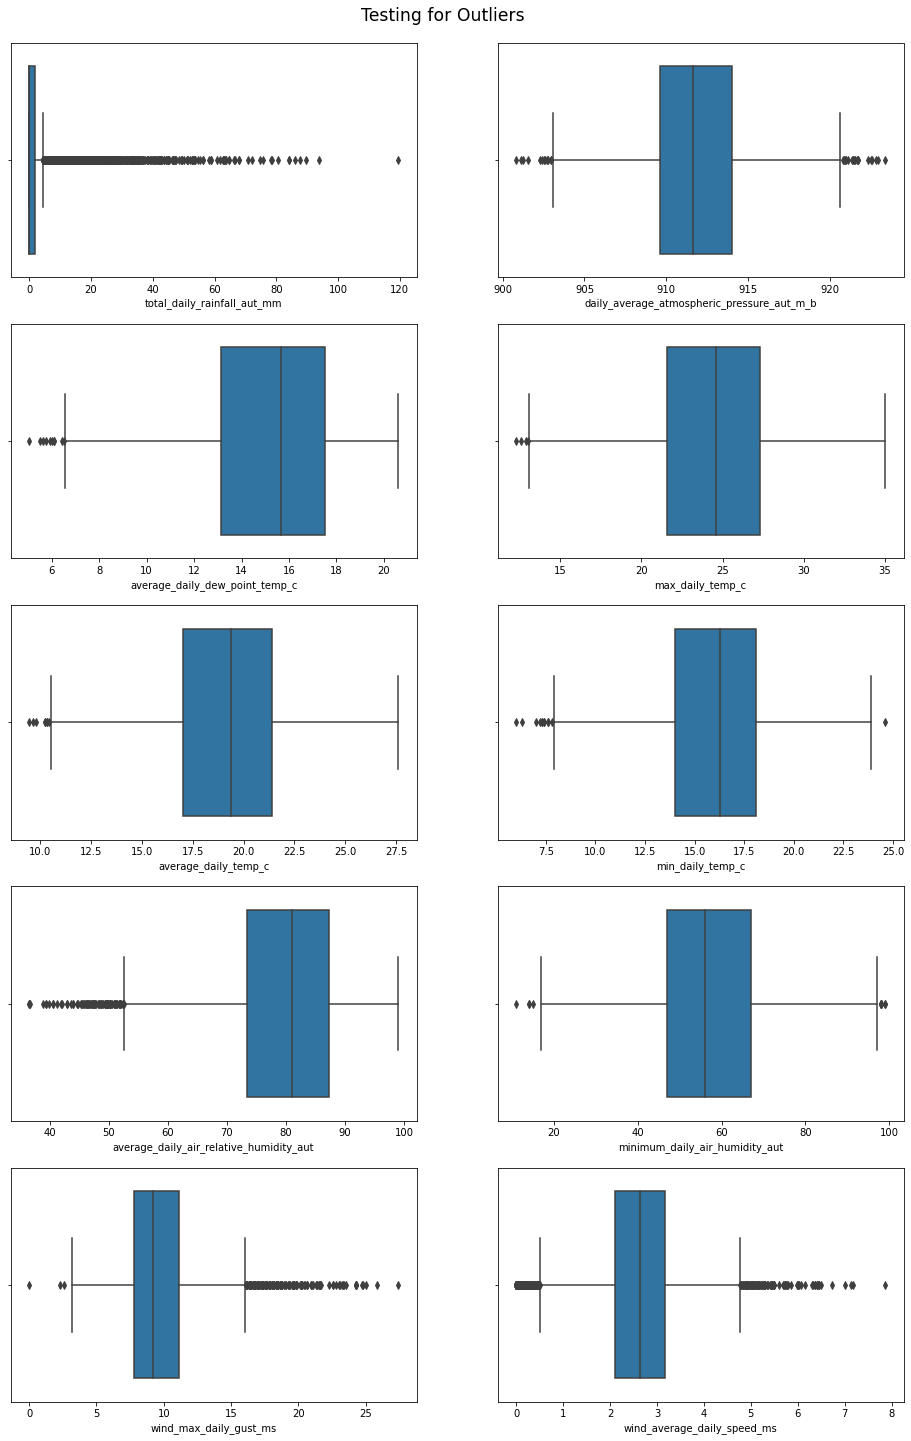

In [12]:
fig, axes = plt.subplots(5,2, figsize=(16,25))
fig.suptitle('Testing for Outliers', y= 0.9, fontsize =  'xx-large')
sns.boxplot(ax=axes[0, 0], x='total_daily_rainfall_aut_mm', data = df)
sns.boxplot(ax=axes[0, 1], x='daily_average_atmospheric_pressure_aut_m_b', data = df)
sns.boxplot(ax=axes[1, 0], x='average_daily_dew_point_temp_c', data = df)
sns.boxplot(ax=axes[1, 1], x='max_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 0], x='average_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 1], x='min_daily_temp_c', data = df)
sns.boxplot(ax=axes[3, 0], x='average_daily_air_relative_humidity_aut', data = df)
sns.boxplot(ax=axes[3, 1], x='minimum_daily_air_humidity_aut', data = df)
sns.boxplot(ax=axes[4, 0], x='wind_max_daily_gust_ms',  data = df)
sns.boxplot(ax=axes[4, 1], x='wind_average_daily_speed_ms', data = df)

<AxesSubplot:xlabel='year', ylabel='total_daily_rainfall_aut_mm'>

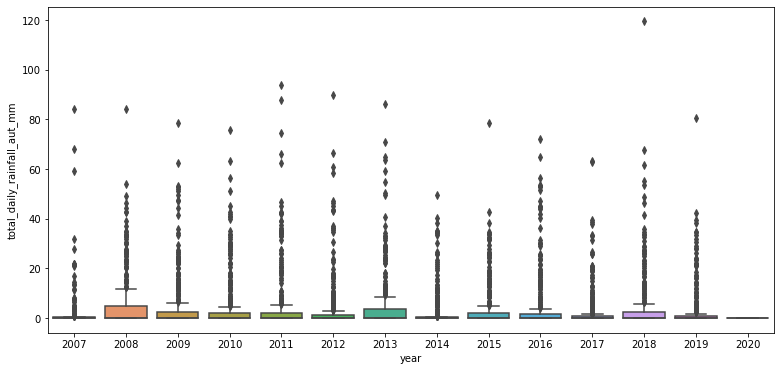

In [13]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='total_daily_rainfall_aut_mm', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='min_daily_temp_c'>

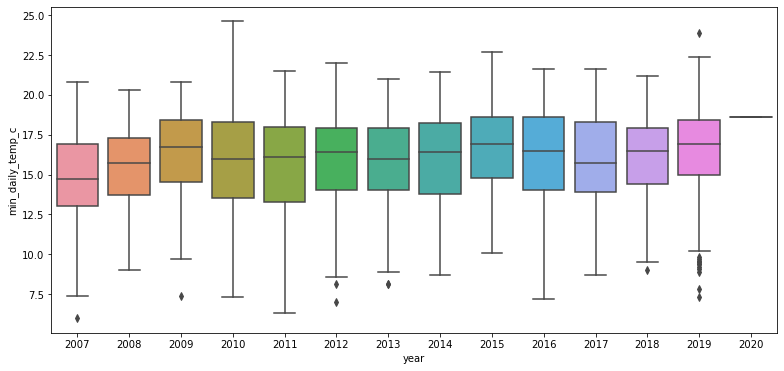

In [14]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='min_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='max_daily_temp_c'>

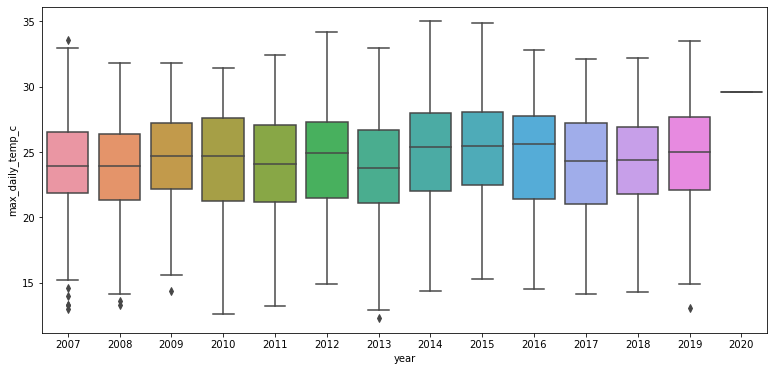

In [15]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='max_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='average_daily_dew_point_temp_c'>

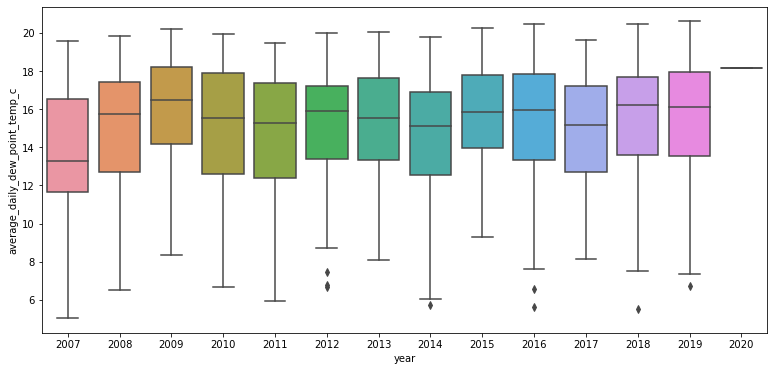

In [16]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='average_daily_dew_point_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='wind_average_daily_speed_ms'>

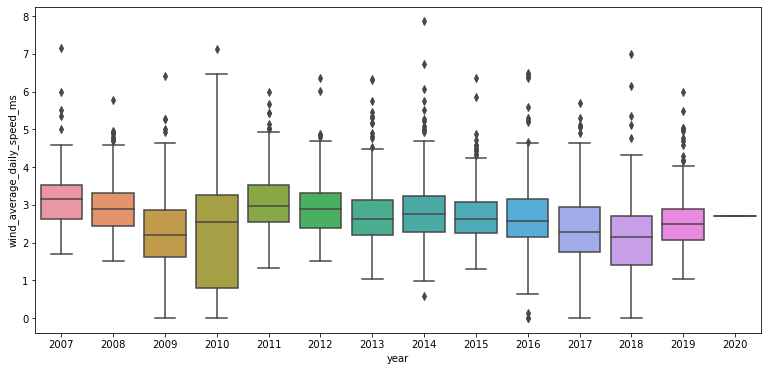

In [17]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='wind_average_daily_speed_ms', x= 'year', data = df)

### Missing values

In [18]:
df.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   135
daily_average_atmospheric_pressure_aut_m_b     51
average_daily_dew_point_temp_c                 54
max_daily_temp_c                               36
average_daily_temp_c                          120
min_daily_temp_c                               33
average_daily_air_relative_humidity_aut        38
minimum_daily_air_humidity_aut                 36
wind_max_daily_gust_ms                         36
wind_average_daily_speed_ms                    51
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

Nulls range 0.7% - 2.9%

In [19]:
df_nulls = df.copy()

#set date as index
df_nulls = df_nulls.set_index('Date')

columns = list(df_nulls.columns)

for col in columns:
    new_col_name = col+"_nulls"
    df_nulls[new_col_name] = 0
    df_nulls.loc[(df_nulls[col].isnull()),[new_col_name]] = 1

df_nulls2 = df_nulls.copy()   

df_nulls.drop(columns=columns, inplace=True)

    
df_nulls.head() 

,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,year_nulls,month_nulls,week_nulls
Date,,,,,,,,,,,,,,,
2007-05-25,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2007-05-26,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2007-05-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Date'>

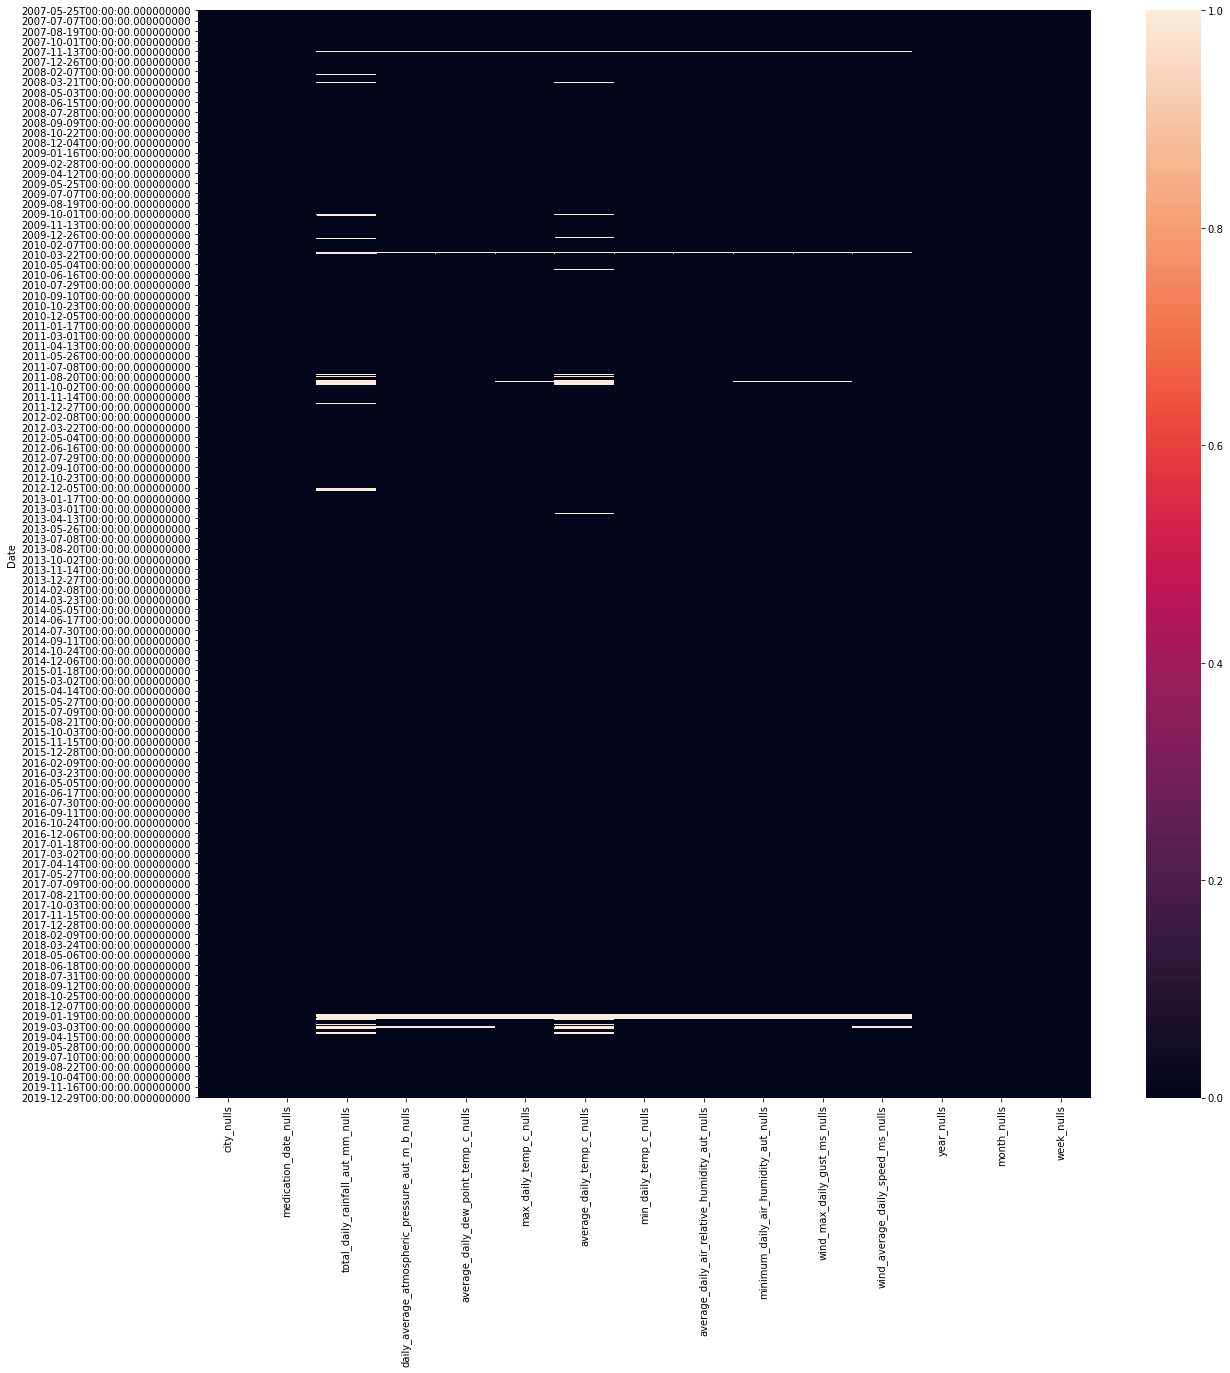

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_nulls)

In [22]:
df_copy2 = df.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,Date_nulls,year_nulls,month_nulls,week_nulls
0,Juiz_de_fora,25/05/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-25,2007,5,21,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
1,Juiz_de_fora,26/05/2007,NaN,912.090000,8.590000,18.9,NaN,NaN,60.300000,49.0,8.4,3.020000,2007-05-26,2007,5,21,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
2,Juiz_de_fora,27/05/2007,0.8,911.045833,11.600000,19.4,14.545833,11.1,82.958333,68.0,7.2,2.608333,2007-05-27,2007,5,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Juiz_de_fora,28/05/2007,6.6,910.533333,12.850000,20.3,15.712500,12.7,83.916667,59.0,6.4,2.641667,2007-05-28,2007,5,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Juiz_de_fora,29/05/2007,0.0,909.925000,13.983333,21.1,16.458333,14.3,86.166667,61.0,11.5,2.770833,2007-05-29,2007,5,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([679., 345., 351., 374., 389., 403., 391., 369., 400., 769.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

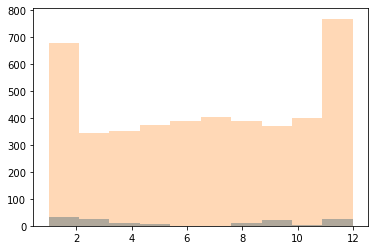

In [23]:
# test if rain nulls are dont random in relation to the month

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'month']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'month']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([  10.,   35.,  149.,  366.,  743.,  854.,  911., 1009.,  357.,
          36.]),
 array([ 6.  ,  7.67,  9.34, 11.01, 12.68, 14.35, 16.02, 17.69, 19.36,
        21.03, 22.7 ]),
 <BarContainer object of 10 artists>)

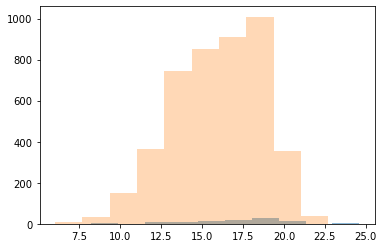

In [24]:
# test if rain nulls are dont random in relation to the min temp

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'min_daily_temp_c']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'min_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([ 21., 117., 330., 577., 798., 924., 900., 639., 144.,  20.]),
 array([12.3 , 14.57, 16.84, 19.11, 21.38, 23.65, 25.92, 28.19, 30.46,
        32.73, 35.  ]),
 <BarContainer object of 10 artists>)

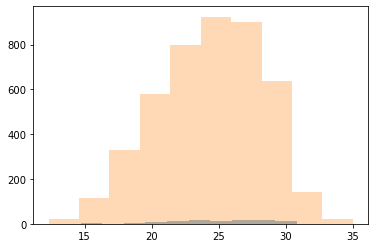

In [25]:
# test if rain nulls are dont random in relation to the max temp

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'max_daily_temp_c']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'max_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

Missing Mechanism appears to be MCAR, (probably due to equipment malfunction)

-----------------------------
### Missing values treatment:
1. Use 'ffill' and 'bfill' in for when 1-2 rows missing
2. Drop rows where all climate data is missing
3. Use KNN to fill the remaining nulls

In [26]:
col_list = ['total_daily_rainfall_aut_mm',
       'daily_average_atmospheric_pressure_aut_m_b',
       'average_daily_dew_point_temp_c', 'max_daily_temp_c',
       'average_daily_temp_c', 'min_daily_temp_c',
       'average_daily_air_relative_humidity_aut',
       'minimum_daily_air_humidity_aut', 'wind_max_daily_gust_ms',
       'wind_average_daily_speed_ms']

In [27]:
df_clean = df.copy()

# fillna for single rows
df_clean.fillna(method = 'ffill', limit = 1, inplace = True)
df_clean.fillna(method = 'bfill', limit = 1, inplace = True)
df_clean.isnull().sum()

city                                           0
medication_date                                0
total_daily_rainfall_aut_mm                   83
daily_average_atmospheric_pressure_aut_m_b    28
average_daily_dew_point_temp_c                29
max_daily_temp_c                              26
average_daily_temp_c                          69
min_daily_temp_c                              25
average_daily_air_relative_humidity_aut       26
minimum_daily_air_humidity_aut                26
wind_max_daily_gust_ms                        26
wind_average_daily_speed_ms                   28
Date                                           0
year                                           0
month                                          0
week                                           0
dtype: int64

In [28]:
#drop rows
df_clean.dropna(how= 'all', subset = col_list, inplace = True)
df_clean.isnull().sum()

city                                           0
medication_date                                0
total_daily_rainfall_aut_mm                   60
daily_average_atmospheric_pressure_aut_m_b     5
average_daily_dew_point_temp_c                 6
max_daily_temp_c                               3
average_daily_temp_c                          46
min_daily_temp_c                               2
average_daily_air_relative_humidity_aut        3
minimum_daily_air_humidity_aut                 3
wind_max_daily_gust_ms                         3
wind_average_daily_speed_ms                    5
Date                                           0
year                                           0
month                                          0
week                                           0
dtype: int64

<AxesSubplot:>

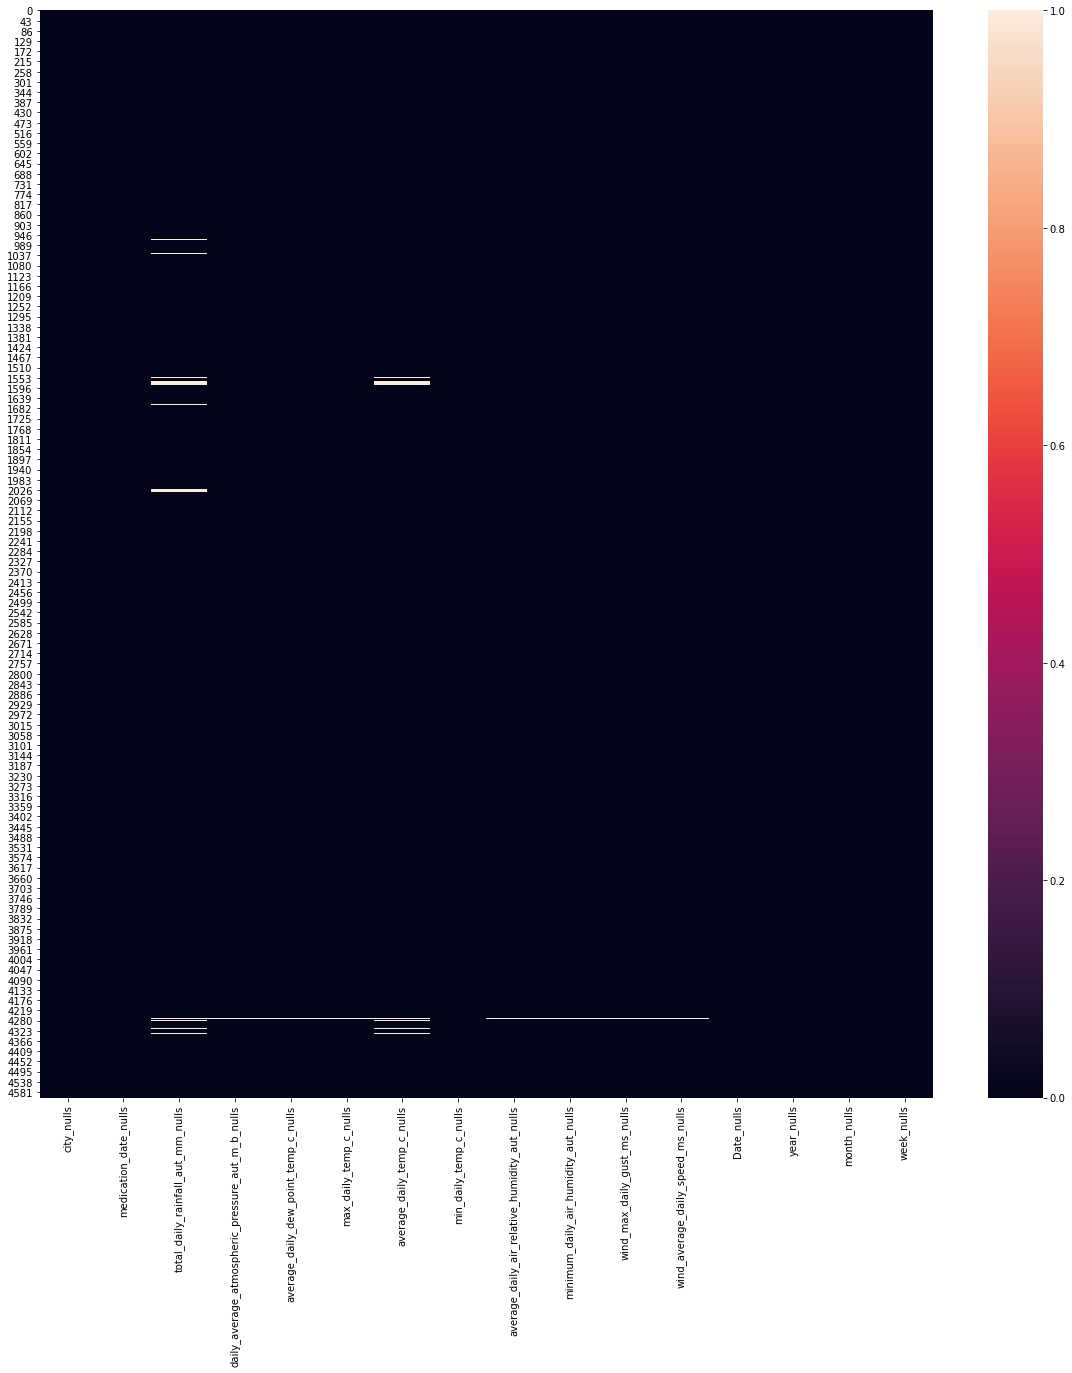

In [29]:
columns = list(df_clean.columns)
df_copy2 = df_clean.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.drop(columns=columns, inplace=True)
    
plt.figure(figsize=(20,20))
sns.heatmap(df_copy2)

<AxesSubplot:>

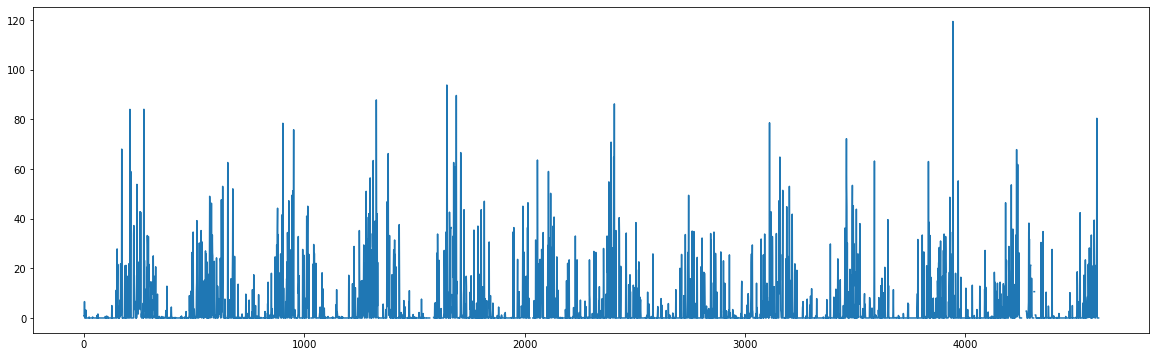

In [30]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

<AxesSubplot:>

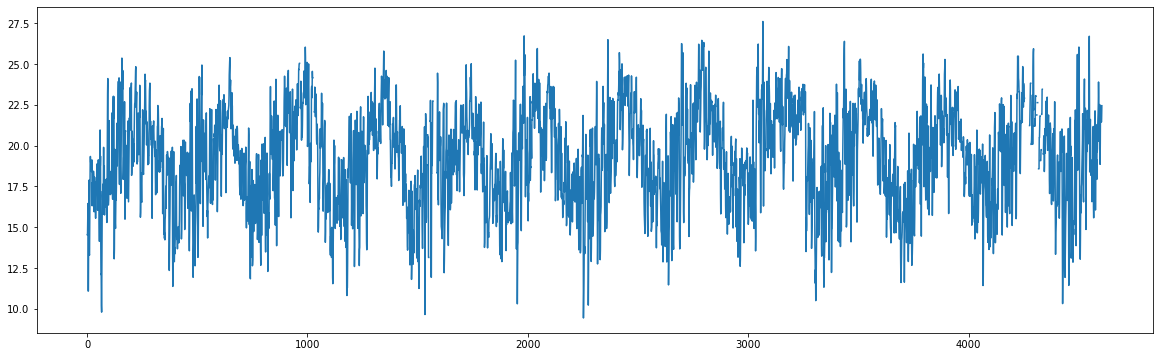

In [31]:
df_clean['average_daily_temp_c'].plot(figsize=(20,6))

In [32]:
imputer = KNNImputer(copy = False)
df_clean[col_list] = imputer.fit_transform(df_clean[col_list])

In [33]:
df_clean.isnull().sum()

city                                          0
medication_date                               0
total_daily_rainfall_aut_mm                   0
daily_average_atmospheric_pressure_aut_m_b    0
average_daily_dew_point_temp_c                0
max_daily_temp_c                              0
average_daily_temp_c                          0
min_daily_temp_c                              0
average_daily_air_relative_humidity_aut       0
minimum_daily_air_humidity_aut                0
wind_max_daily_gust_ms                        0
wind_average_daily_speed_ms                   0
Date                                          0
year                                          0
month                                         0
week                                          0
dtype: int64

<AxesSubplot:>

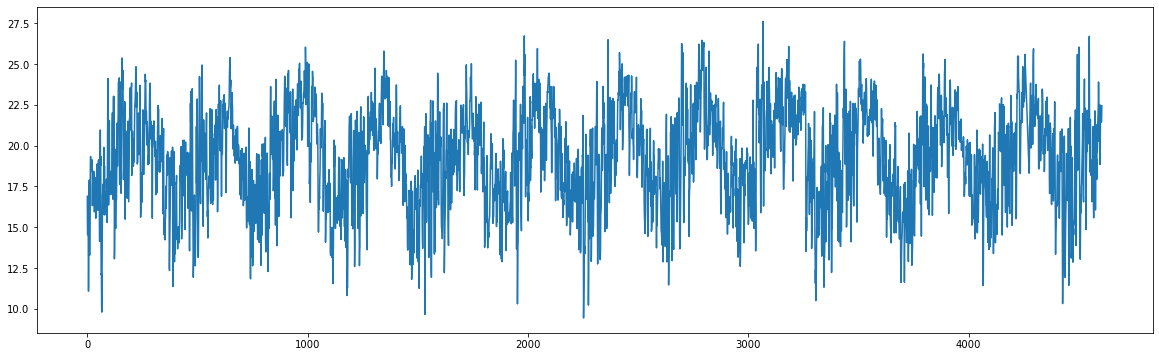

In [34]:
df_clean['average_daily_temp_c'].plot(figsize=(20,6))

<AxesSubplot:>

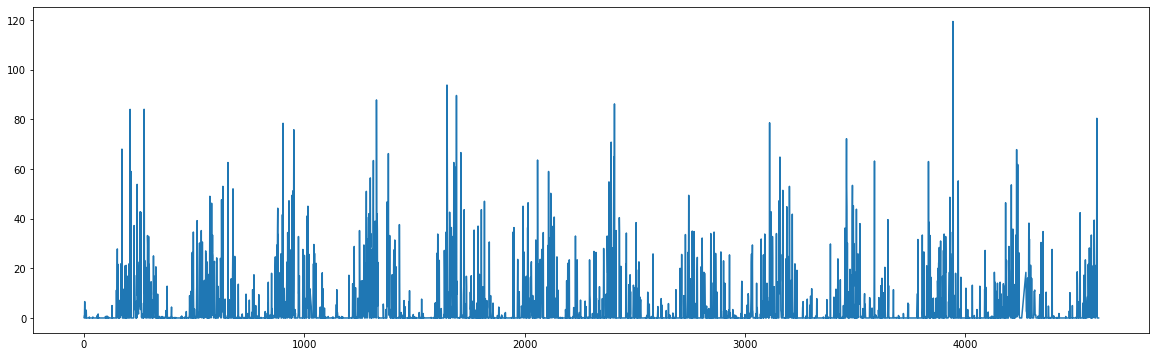

In [35]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

In [36]:
df_clean.describe(include = 'all')

<ipython-input-36-f216b512c299>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clean.describe(include = 'all')


,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
count,4582,4582,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582,4582.000000,4582.000000,4582.000000
unique,1,4582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4582,NaN,NaN,NaN
top,Juiz_de_fora,28/03/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-18 00:00:00,NaN,NaN,NaN
freq,4582,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-25 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,4.171916,911.832040,15.202542,24.362850,19.205503,15.973531,79.594222,57.043431,9.780860,2.633917,NaN,2013.169140,6.659974,27.161938
std,NaN,NaN,10.494735,3.308957,2.876163,3.867981,2.985333,2.727292,10.653150,15.222628,2.946687,0.959591,NaN,3.634283,3.423542,14.958167
min,NaN,NaN,0.000000,900.829167,5.050000,12.300000,9.445833,6.000000,36.500000,11.000000,0.000000,0.000000,NaN,2007.000000,1.000000,1.000000
25%,NaN,NaN,0.000000,909.601042,13.146875,21.600000,17.066667,14.000000,73.427083,47.000000,7.800000,2.108333,NaN,2010.000000,4.000000,14.000000


Keep only rows with relevent dates. i.e. drop all rows with year < 2012

In [37]:
df_clean.drop(df_clean[df_clean['year'] < 2012].index, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 1682 to 4604
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   city                                        2905 non-null   object        
 1   medication_date                             2905 non-null   object        
 2   total_daily_rainfall_aut_mm                 2905 non-null   float64       
 3   daily_average_atmospheric_pressure_aut_m_b  2905 non-null   float64       
 4   average_daily_dew_point_temp_c              2905 non-null   float64       
 5   max_daily_temp_c                            2905 non-null   float64       
 6   average_daily_temp_c                        2905 non-null   float64       
 7   min_daily_temp_c                            2905 non-null   float64       
 8   average_daily_air_relative_humidity_aut     2905 non-null   float64       
 9   minim

In [38]:
#fix problem of the number of last week of the year 

df_clean.loc[(df_clean['week'] == 1) & (df_clean['month'] == 12), 'year'] = df_clean['year'] +1
df_clean.loc[(df_clean['week'] >= 52) & (df_clean['month'] == 1), 'year'] = df_clean['year'] -1
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
4595,Juiz_de_fora,23/12/2019,14.4,909.795833,18.179167,23.5,19.458333,17.9,92.458333,78.0,20.3,2.750000,2019-12-23,2019,12,52
4596,Juiz_de_fora,24/12/2019,80.4,910.137500,17.570833,22.4,18.854167,17.0,92.541667,75.0,15.6,1.850000,2019-12-24,2019,12,52
4597,Juiz_de_fora,25/12/2019,17.0,910.641667,16.837500,26.7,20.183333,16.0,82.583333,55.0,7.4,1.462500,2019-12-25,2019,12,52
4598,Juiz_de_fora,26/12/2019,0.0,911.616667,17.341667,28.4,22.429167,17.7,75.208333,45.0,9.1,2.529167,2019-12-26,2019,12,52
4599,Juiz_de_fora,27/12/2019,0.0,912.408333,17.475000,27.2,22.133333,18.1,76.458333,51.0,8.7,3.054167,2019-12-27,2019,12,52
4600,Juiz_de_fora,28/12/2019,0.0,911.887500,17.283333,27.0,21.733333,17.6,77.125000,53.0,12.4,3.212500,2019-12-28,2019,12,52
4601,Juiz_de_fora,29/12/2019,0.0,910.533333,16.487500,28.1,21.708333,17.0,73.916667,45.0,10.8,3.175000,2019-12-29,2019,12,52
4602,Juiz_de_fora,30/12/2019,0.0,908.666667,16.125000,27.6,21.441667,17.0,73.416667,49.0,11.7,2.670833,2019-12-30,2020,12,1
4603,Juiz_de_fora,31/12/2019,0.0,907.920833,17.000000,27.8,21.645833,17.3,76.333333,51.0,9.7,2.783333,2019-12-31,2020,12,1
4604,Juiz_de_fora,01/01/2020,0.0,906.450000,18.162500,29.6,22.445833,18.6,78.083333,48.0,10.3,2.695833,2020-01-01,2020,1,1


In [39]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
1682,Juiz_de_fora,01/01/2012,22.6,903.945833,18.979167,21.6,19.704167,18.6,95.666667,91.0,13.1,3.720833,2012-01-01,2011,1,52
1683,Juiz_de_fora,02/01/2012,60.8,903.070833,17.987500,19.6,18.491667,18.4,96.833333,96.0,8.4,2.733333,2012-01-02,2012,1,1
1684,Juiz_de_fora,03/01/2012,16.2,906.454167,15.570833,26.1,19.245833,14.8,80.166667,59.0,9.2,3.025000,2012-01-03,2012,1,1
1685,Juiz_de_fora,04/01/2012,0.2,908.900000,17.220833,26.2,19.729167,17.9,86.666667,58.0,16.9,2.212500,2012-01-04,2012,1,1
1686,Juiz_de_fora,05/01/2012,18.2,910.041667,16.916667,26.0,20.358333,15.1,81.916667,57.0,9.0,2.475000,2012-01-05,2012,1,1


In [40]:
# make column of 'week of the year' in format yyyyww

df_clean['week'] = df_clean['week'].astype('str').str.pad(width=2, side='left', fillchar='0')
df_clean["weekofyear"] = df_clean['year'].astype('str') + df_clean['week'].astype('str')
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
4595,Juiz_de_fora,23/12/2019,14.4,909.795833,18.179167,23.5,19.458333,17.9,92.458333,78.0,20.3,2.750000,2019-12-23,2019,12,52,201952
4596,Juiz_de_fora,24/12/2019,80.4,910.137500,17.570833,22.4,18.854167,17.0,92.541667,75.0,15.6,1.850000,2019-12-24,2019,12,52,201952
4597,Juiz_de_fora,25/12/2019,17.0,910.641667,16.837500,26.7,20.183333,16.0,82.583333,55.0,7.4,1.462500,2019-12-25,2019,12,52,201952
4598,Juiz_de_fora,26/12/2019,0.0,911.616667,17.341667,28.4,22.429167,17.7,75.208333,45.0,9.1,2.529167,2019-12-26,2019,12,52,201952
4599,Juiz_de_fora,27/12/2019,0.0,912.408333,17.475000,27.2,22.133333,18.1,76.458333,51.0,8.7,3.054167,2019-12-27,2019,12,52,201952
4600,Juiz_de_fora,28/12/2019,0.0,911.887500,17.283333,27.0,21.733333,17.6,77.125000,53.0,12.4,3.212500,2019-12-28,2019,12,52,201952
4601,Juiz_de_fora,29/12/2019,0.0,910.533333,16.487500,28.1,21.708333,17.0,73.916667,45.0,10.8,3.175000,2019-12-29,2019,12,52,201952
4602,Juiz_de_fora,30/12/2019,0.0,908.666667,16.125000,27.6,21.441667,17.0,73.416667,49.0,11.7,2.670833,2019-12-30,2020,12,01,202001
4603,Juiz_de_fora,31/12/2019,0.0,907.920833,17.000000,27.8,21.645833,17.3,76.333333,51.0,9.7,2.783333,2019-12-31,2020,12,01,202001
4604,Juiz_de_fora,01/01/2020,0.0,906.450000,18.162500,29.6,22.445833,18.6,78.083333,48.0,10.3,2.695833,2020-01-01,2020,1,01,202001


In [41]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
1682,Juiz_de_fora,01/01/2012,22.6,903.945833,18.979167,21.6,19.704167,18.6,95.666667,91.0,13.1,3.720833,2012-01-01,2011,1,52,201152
1683,Juiz_de_fora,02/01/2012,60.8,903.070833,17.987500,19.6,18.491667,18.4,96.833333,96.0,8.4,2.733333,2012-01-02,2012,1,01,201201
1684,Juiz_de_fora,03/01/2012,16.2,906.454167,15.570833,26.1,19.245833,14.8,80.166667,59.0,9.2,3.025000,2012-01-03,2012,1,01,201201
1685,Juiz_de_fora,04/01/2012,0.2,908.900000,17.220833,26.2,19.729167,17.9,86.666667,58.0,16.9,2.212500,2012-01-04,2012,1,01,201201
1686,Juiz_de_fora,05/01/2012,18.2,910.041667,16.916667,26.0,20.358333,15.1,81.916667,57.0,9.0,2.475000,2012-01-05,2012,1,01,201201


In [33]:
df_clean.to_csv('Juiz_de_fora_climate_KNN.csv', index=False)